#WATER QUALITY PREDICTION

##Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##Loading the Dataset

In [2]:
data_water=pd.read_csv('water_potability.csv')
print("Dataset shape:",data_water.shape)

Dataset shape: (3276, 10)


In [3]:
data_water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
data_water.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [5]:
data_water.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [6]:
data_water.dtypes

,0
ph,float64
Hardness,float64
Solids,float64
Chloramines,float64
Sulfate,float64
Conductivity,float64
Organic_carbon,float64
Trihalomethanes,float64
Turbidity,float64
Potability,int64


In [7]:
data_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
data_water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


#DATA PREPROCESSING

##Checking for Duplicate Records

In [9]:
data_water.duplicated().any()

np.False_

##Checking for Missing Values

In [10]:
null_df=data_water.isnull().sum().reset_index()
null_df.columns=['Column','Null_count']
null_df['%miss_value']=round(null_df['Null_count']/len(data_water),2)*100
null_df

,Column,Null_count,%miss_value
0,ph,491,15.0
1,Hardness,0,0.0
2,Solids,0,0.0
3,Chloramines,0,0.0
4,Sulfate,781,24.0
5,Conductivity,0,0.0
6,Organic_carbon,0,0.0
7,Trihalomethanes,162,5.0
8,Turbidity,0,0.0
9,Potability,0,0.0


###Visualizing Missing Values with Heatmap

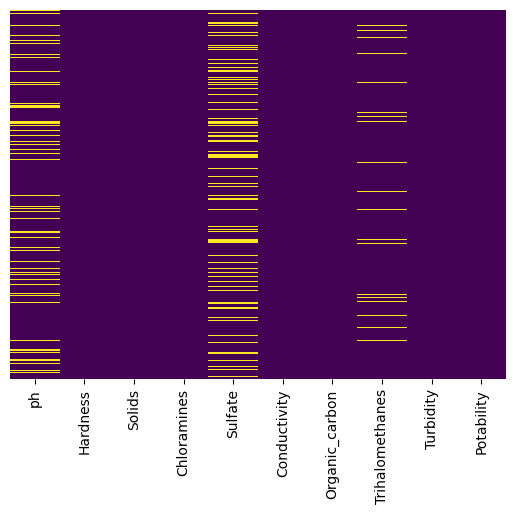

In [11]:
sns.heatmap(data_water.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

<Axes: ylabel='Frequency'>

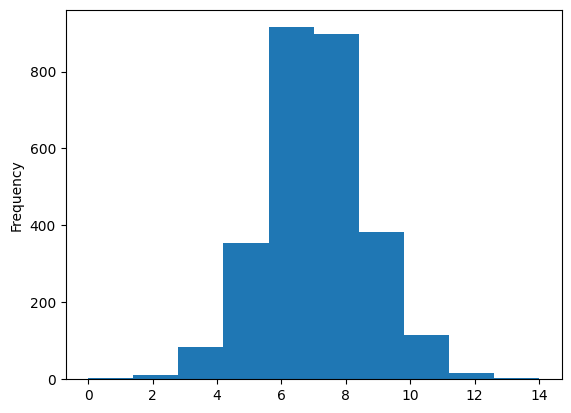

In [12]:
data_water['ph'].plot(kind='hist')

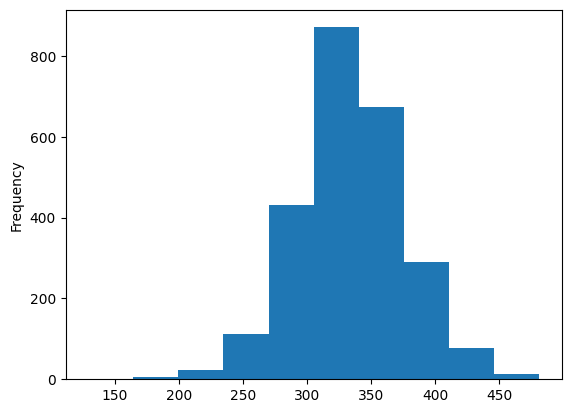

In [13]:
data_water['Sulfate'].plot(kind='hist')
plt.show()

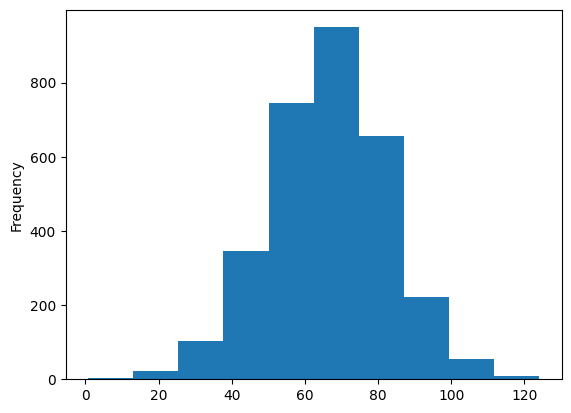

In [14]:
data_water['Trihalomethanes'].plot(kind='hist')
plt.show()

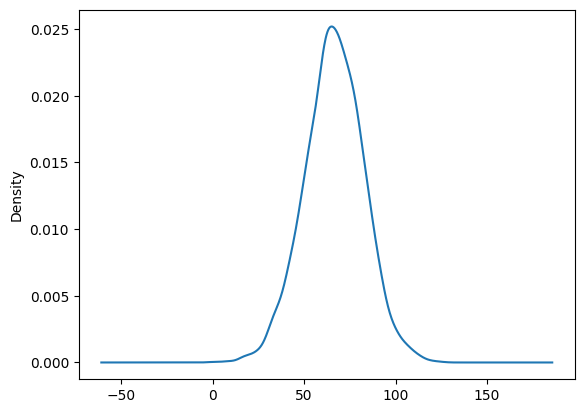

In [15]:
fig=plt.figure()
ax=fig.add_subplot(111)
data_water['Trihalomethanes'].plot(kind='kde',ax=ax)
plt.show()

##Handling Missing Values

In [16]:
data_water['ph']=data_water['ph'].fillna(data_water['ph'].mean())
data_water['Sulfate']=data_water['Sulfate'].fillna(data_water['Sulfate'].mean())
data_water['Trihalomethanes']=data_water['Trihalomethanes'].fillna(data_water['Trihalomethanes'].mean())

##Verifying no missing values remain

In [17]:
data_water.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


##Feature Selection

In [18]:
x=data_water.drop('Potability',axis=1)
y=data_water['Potability']

In [19]:
x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [20]:
y.head()

,Potability
0,0
1,0
2,0
3,0
4,0


##Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_scaled

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

##Training and Test Split

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [23]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2620, 9), (656, 9), (2620,), (656,))

#MODEL BUILDING AND EVALUATION

##Importing Libraries

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

##Initialize Models

In [25]:
log_model = LogisticRegression(random_state=42)
tree_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(class_weight="balanced",random_state=42)

##Train Models

In [26]:
log_model.fit(x_train, y_train)
tree_model.fit(x_train, y_train)
rf_model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

##Make Predictions

In [39]:
y_pred_log = log_model.predict(x_test)
y_pred_tree = tree_model.predict(x_test)
y_pred_rf = rf_model.predict(x_test)

##Evaluate Models

In [28]:
def evaluate_model(name, y_test, y_pred):
    print(f"===== {name} Evaluation =====")
    print("\n")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Decision Tree", y_test, y_pred_tree)
evaluate_model("Random Forest", y_test, y_pred_rf)

===== Logistic Regression Evaluation =====


Accuracy: 0.6280487804878049
Confusion Matrix:
 [[412   0]
 [244   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



===== Decision Tree Evaluation =====


Accuracy: 0.5777439024390244
Confusion Matrix:
 [[255 157]
 [120 124]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.62      0.65       412
           1       0.44      0.51      0.47       244

    accuracy                           0.58       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.59      0.58      0.58       656



===== Random Forest Evaluation =====


Accuracy: 0.6798780487804879


##Compare Model Accuracy

In [29]:
accuracy_table = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_tree),
        accuracy_score(y_test, y_pred_rf)
    ]
})

print("===== Accuracy Comparison =====\n")
print(accuracy_table)


===== Accuracy Comparison =====

                 Model  Accuracy
0  Logistic Regression  0.628049
1        Decision Tree  0.577744
2        Random Forest  0.679878


##Confusion Matrix Heatmap for Random Forest

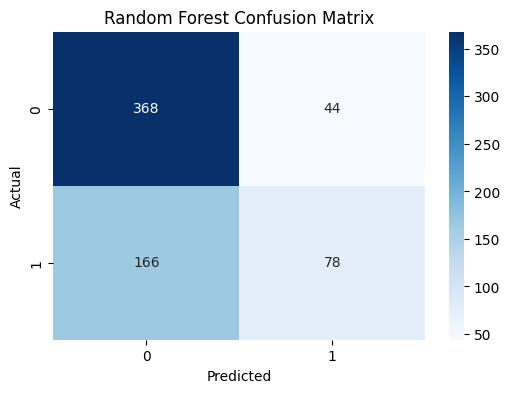

In [30]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

#DEPLOYMENT

In [31]:
import pickle

##Save both Scaler and Model

In [32]:
with open('water_potability_scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)
with open('water_potability_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

##Load Scaler and Model

In [40]:
with open('water_potability_scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
with open('water_potability_model.pkl', 'rb') as f:
    model = pickle.load(f)

#Build Gradio Interface

In [41]:
import gradio as gr
import numpy as np

##Predicting the result:

In [35]:
safe_rows=data_water[data_water['Potability']==1]
safe_sample=safe_rows.sample(1)
safe_sample

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1205,4.429379,256.212565,8746.901717,9.010332,333.775777,432.107935,16.307474,66.396293,4.271168,1


In [43]:
unsafe_rows=data_water[data_water["Potability"]==0]
unsafe_sample=unsafe_rows.sample(1)
unsafe_sample

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1763,7.080795,149.8389,20283.783629,10.005871,383.113114,355.184935,17.003495,53.79972,2.028875,0


In [42]:
def predict(ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity):
    input_data = np.array([[ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity]])
    input_data_scaled = scaler.transform(input_data)
    prediction = model.predict(input_data_scaled)
    if prediction[0] == 1:
      return "<span style='color:green;font-size:30px;'>Safe to drink</span>"
    else:
      return "<span style='color:red;font-size:30px;'>Not Safe to Drink</span>"

iface=gr.Interface(fn=predict,inputs=[gr.Number(label="pH"),
                                      gr.Number(label="Hardness"),
                                      gr.Number(label="Solids"),
                                      gr.Number(label="Chloramines"),
                                      gr.Number(label="Sulfate"),
                                      gr.Number(label="Conductivity"),
                                      gr.Number(label="Organic_carbon"),
                                      gr.Number(label="Trihalomethanes"),
                                      gr.Number(label="Turbidity")],
                   outputs="html",
                   title="Water Quality Prediction"
                   )
iface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://18cbcf5f743bbdf8a0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Predicting the Result for Unsafe water:

In [37]:
unsafe_rows=data_water[data_water["Potability"]==0]
unsafe_sample=unsafe_rows.sample(1)
unsafe_sample

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3111,8.761768,212.426952,14168.924869,6.385733,333.775777,488.599547,12.601801,60.237073,4.673548,0
